<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.610453,33.645202,-3.912470,70.343186,78.105562,-7.762376
1,0.0,1.0,96.007733,30.353440,8.327512,144.688685,136.805700,7.882984
2,0.0,2.0,90.142659,97.238515,-60.906965,136.474210,182.150429,-45.676220
3,0.0,3.0,20.275375,26.694710,-15.023660,41.946425,63.151031,-21.204607
4,0.0,4.0,49.305585,41.336582,-14.805933,85.836234,101.446916,-15.610683
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.083451,34.233124,13.276879,105.593454,100.676506,4.916948
19996,999.0,16.0,70.843399,43.606892,-41.521381,82.928910,131.605535,-48.676624
19997,999.0,17.0,75.749045,85.997215,-36.161097,135.585163,166.961129,-31.375966
19998,999.0,18.0,52.721178,96.749624,-42.519928,116.950874,150.049261,-33.098387


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    30.610453  33.645202  -3.912470   70.343186   78.105562   
      1.0    96.007733  30.353440   8.327512  144.688685  136.805700   
      2.0    90.142659  97.238515 -60.906965  136.474210  182.150429   
      3.0    20.275375  26.694710 -15.023660   41.946425   63.151031   
      4.0    49.305585  41.336582 -14.805933   85.836234  101.446916   
...                ...        ...        ...         ...         ...   
999.0 15.0   48.083451  34.233124  13.276879  105.593454  100.676506   
      16.0   70.843399  43.606892 -41.521381   82.928910  131.605535   
      17.0   75.749045  85.997215 -36.161097  135.585163  166.961129   
      18.0   52.721178  96.749624 -42.519928  116.950874  150.049261   
      19.0   24.607784  59.850343 -31.566519   62.891608   93.850972   

                 e_hat  
rep   index             
0.0   0.0    -7.762376  
      1.0     7.882984  
      2.0   -45.676220  
      3.0   -21.204607  
      4.0   -15.610683  
...                ...  
999.0 15.0    4.916948  
      16.0  -48.676624  
      17.0  -31.375966  
      18.0  -33.098387  
      19.0  -30.959364  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    30.610453  33.645202  -3.912470   70.343186   78.105562   
      1.0    96.007733  30.353440   8.327512  144.688685  136.805700   
      2.0    90.142659  97.238515 -60.906965  136.474210  182.150429   
      3.0    20.275375  26.694710 -15.023660   41.946425   63.151031   
      4.0    49.305585  41.336582 -14.805933   85.836234  101.446916   
...                ...        ...        ...         ...         ...   
999.0 15.0   48.083451  34.233124  13.276879  105.593454  100.676506   
      16.0   70.843399  43.606892 -41.521381   82.928910  131.605535   
      17.0   75.749045  85.997215 -36.161097  135.585163  166.961129   
      18.0   52.721178  96.749624 -42.519928  116.950874  150.049261   
      19.0   24.607784  59.850343 -31.566519   62.891608   93.850972   

                 e_hat  
rep   index             
0.0   0.0    -7.762376  
      1.0     7.882984  
      2.0   -45.676220  
      3.0   -21.204607  
      4.0   -15.610683  
...                ...  
999.0 15.0    4.916948  
      16.0  -48.676624  
      17.0  -31.375966  
      18.0  -33.098387  
      19.0  -30.959364  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,30.610453,33.645202,-3.912470,70.343186,78.105562,-7.762376
1,0.0,1.0,96.007733,30.353440,8.327512,144.688685,136.805700,7.882984
2,0.0,2.0,90.142659,97.238515,-60.906965,136.474210,182.150429,-45.676220
3,0.0,3.0,20.275375,26.694710,-15.023660,41.946425,63.151031,-21.204607
4,0.0,4.0,49.305585,41.336582,-14.805933,85.836234,101.446916,-15.610683
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,48.083451,34.233124,13.276879,105.593454,100.676506,4.916948
19996,999.0,16.0,70.843399,43.606892,-41.521381,82.928910,131.605535,-48.676624
19997,999.0,17.0,75.749045,85.997215,-36.161097,135.585163,166.961129,-31.375966
19998,999.0,18.0,52.721178,96.749624,-42.519928,116.950874,150.049261,-33.098387


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    30.610453  33.645202  -3.912470   70.343186   78.105562   
      1.0    96.007733  30.353440   8.327512  144.688685  136.805700   
      2.0    90.142659  97.238515 -60.906965  136.474210  182.150429   
      3.0    20.275375  26.694710 -15.023660   41.946425   63.151031   
      4.0    49.305585  41.336582 -14.805933   85.836234  101.446916   
...                ...        ...        ...         ...         ...   
999.0 15.0   48.083451  34.233124  13.276879  105.593454  100.676506   
      16.0   70.843399  43.606892 -41.521381   82.928910  131.605535   
      17.0   75.749045  85.997215 -36.161097  135.585163  166.961129   
      18.0   52.721178  96.749624 -42.519928  116.950874  150.049261   
      19.0   24.607784  59.850343 -31.566519   62.891608   93.850972   

                 e_hat  
rep   index             
0.0   0.0    -7.762376  
      1.0     7.882984  
      2.0   -45.676220  
      3.0   -21.204607  
      4.0   -15.610683  
...                ...  
999.0 15.0    4.916948  
      16.0  -48.676624  
      17.0  -31.375966  
      18.0  -33.098387  
      19.0  -30.959364  

[20000 rows x 6 columns]

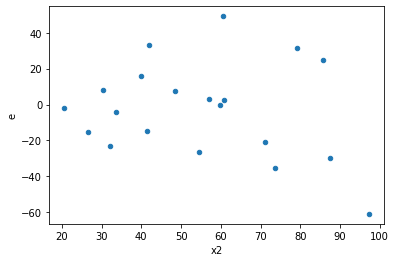

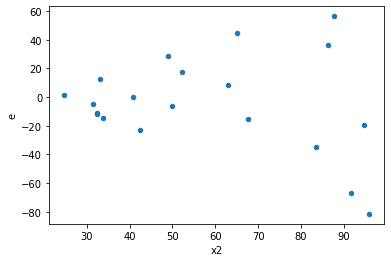

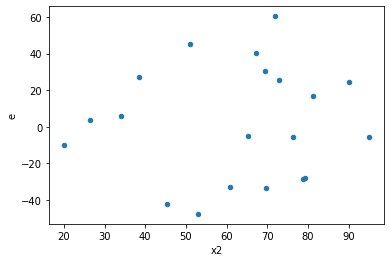

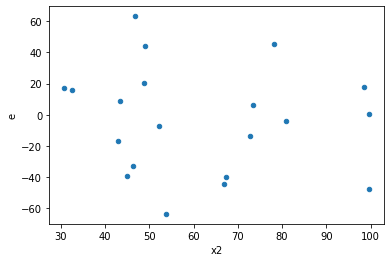

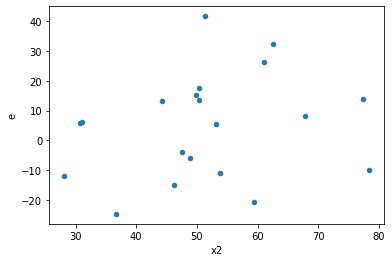

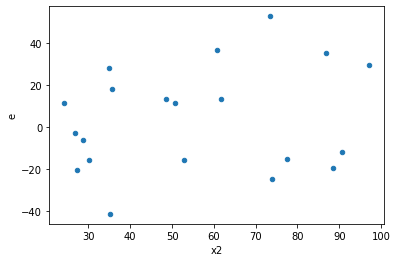

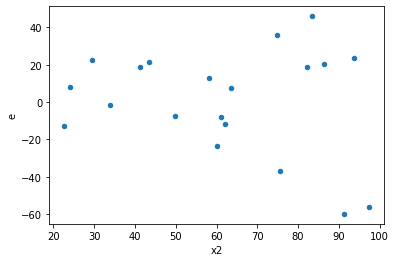

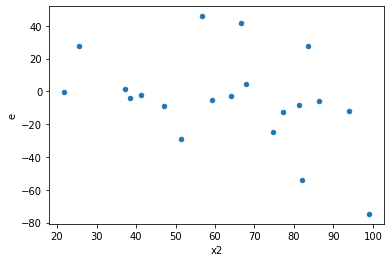

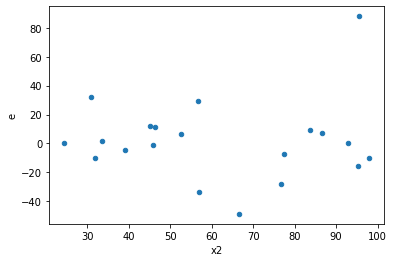

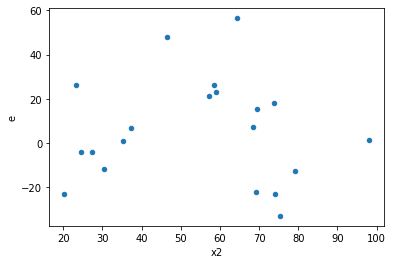

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,6.0,4976.239080564072,4767.836078747643,497.6239080564072,794.6393464579405,1.5968672999687663,0.5858631462999349,0.7070684268500326,0.29293157314996743,Reject001=1 : Homoscedasticity
1.0,4.0,12.0,1224.8012177879118,15151.528477709582,306.20030444697795,1262.627373142465,4.123534022681232,0.04991135473151109,0.9750443226342445,0.024955677365755546,Reject001=1 : Homoscedasticity
3.0,9.0,7.0,10489.049349076018,8682.122816900035,1165.449927675113,1240.3032595571478,1.0642269823048986,0.9566428263724474,0.5216785868137763,0.4783214131862237,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,3598.184509434569,9109.650641980923,449.7730636793211,1138.7063302476154,2.53173527318988,0.2104865108675218,0.8947567445662391,0.1052432554337609,Reject001=1 : Homoscedasticity
8.0,4.0,12.0,883.5417729936153,12874.989233081991,220.88544324840382,1072.9157694234993,4.857340319239224,0.029177395692969732,0.9854113021535151,0.014588697846484866,Reject001=1 : Homoscedasticity
9.0,8.0,8.0,3637.993240523351,5385.881712088304,454.74915506541885,673.235214011038,1.4804540184669248,0.5918321590762952,0.7040839204618524,0.2959160795381476,Reject001=1 : Homoscedasticity
10.0,4.0,12.0,2134.915953030266,6402.638774365763,533.7289882575665,533.5532311971469,0.999670699804046,0.8902003226799813,0.5548998386600094,0.44510016133999064,Reject001=1 : Homoscedasticity
12.0,11.0,5.0,8693.435741640276,4729.165825121681,790.312340149116,945.8331650243363,1.1967840016845448,0.8979230983381177,0.5510384508309412,0.44896154916905884,Reject001=1 : Homoscedasticity
13.0,3.0,13.0,368.6692994344203,16769.635697859914,122.88976647814009,1289.971976758455,10.496984523018995,0.0017665685317971302,0.9991167157341014,0.0008832842658985651,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,4976.239080564072,4767.836078747643,497.6239080564072,794.6393464579405,1.5968672999687663,0.5858631462999349,Reject001=1 : Homoscedasticity
1.0,4.0,12.0,1224.8012177879118,15151.528477709582,306.20030444697795,1262.627373142465,4.123534022681232,0.04991135473151109,Reject001=1 : Homoscedasticity
2.0,9.0,7.0,9879.877472833252,4269.4386947665835,1097.7641636481392,609.9198135380833,0.5556018621624251,0.40459433872914885,Reject001=1 : Homoscedasticity
3.0,9.0,7.0,10489.049349076018,8682.122816900035,1165.449927675113,1240.3032595571478,1.0642269823048986,0.9566428263724474,Reject001=1 : Homoscedasticity
4.0,5.0,11.0,2411.6078367919245,1837.943991292908,482.32156735838487,167.08581739026437,0.34641995858773755,0.2517732584546922,Reject001=1 : Homoscedasticity
5.0,6.0,10.0,5622.123141457221,4399.2466002480405,937.0205235762036,439.92466002480404,0.46949308895156444,0.3673556196435866,Reject001=1 : Homoscedasticity
6.0,9.0,7.0,9673.021280625642,2923.449174472905,1074.780142291738,417.6355963532721,0.3885777006102418,0.1876461628095339,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,3598.184509434569,9109.650641980923,449.7730636793211,1138.7063302476154,2.53173527318988,0.2104865108675218,Reject001=1 : Homoscedasticity
8.0,4.0,12.0,883.5417729936153,12874.989233081991,220.88544324840382,1072.9157694234993,4.857340319239224,0.029177395692969732,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      867
Reject001=0 : Heteroscedasticity    133
Name: Result_test, dtype: int64